# Heart Disease Data Set

https://archive.ics.uci.edu/ml/datasets/Heart+Disease


### Description

- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person's cholesterol measurement in mg/dl
- **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
- **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach:** The person's maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca:** The number of major vessels (0-3)
- **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target:** Heart disease (0 = no, 1 = yes)

### Heart Disease Classification 

Perform exploratory data analysis on the data. Then, train and validate different ML classifiers.

In [52]:
import pandas as pd
df = pd.read_csv("./data/heart.csv")
df.shape

(303, 14)

In [53]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


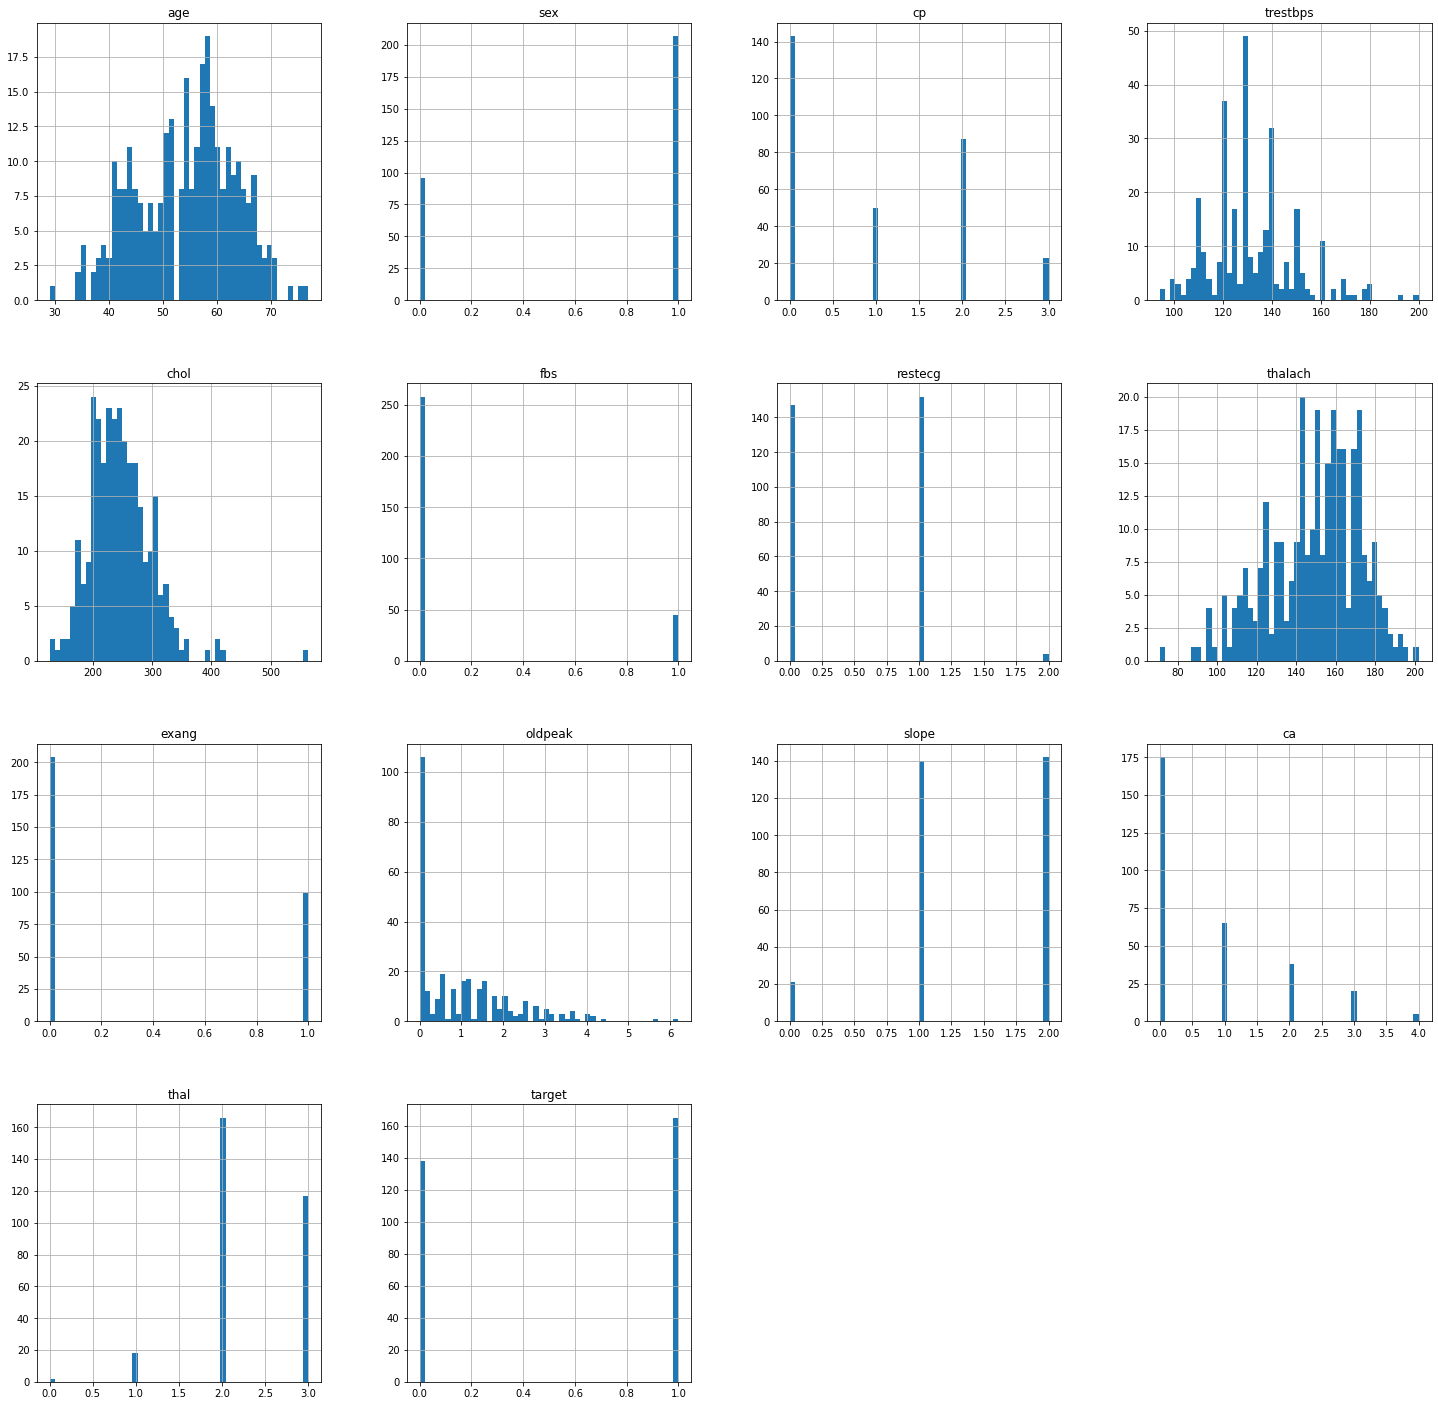

In [54]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(25,25))
plt.show()

In [55]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [56]:
corr_matrix = df.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

array([[<AxesSubplot:xlabel='cp', ylabel='cp'>,
        <AxesSubplot:xlabel='slope', ylabel='cp'>,
        <AxesSubplot:xlabel='thalach', ylabel='cp'>,
        <AxesSubplot:xlabel='restecg', ylabel='cp'>,
        <AxesSubplot:xlabel='target', ylabel='cp'>],
       [<AxesSubplot:xlabel='cp', ylabel='slope'>,
        <AxesSubplot:xlabel='slope', ylabel='slope'>,
        <AxesSubplot:xlabel='thalach', ylabel='slope'>,
        <AxesSubplot:xlabel='restecg', ylabel='slope'>,
        <AxesSubplot:xlabel='target', ylabel='slope'>],
       [<AxesSubplot:xlabel='cp', ylabel='thalach'>,
        <AxesSubplot:xlabel='slope', ylabel='thalach'>,
        <AxesSubplot:xlabel='thalach', ylabel='thalach'>,
        <AxesSubplot:xlabel='restecg', ylabel='thalach'>,
        <AxesSubplot:xlabel='target', ylabel='thalach'>],
       [<AxesSubplot:xlabel='cp', ylabel='restecg'>,
        <AxesSubplot:xlabel='slope', ylabel='restecg'>,
        <AxesSubplot:xlabel='thalach', ylabel='restecg'>,
        <AxesSubplo

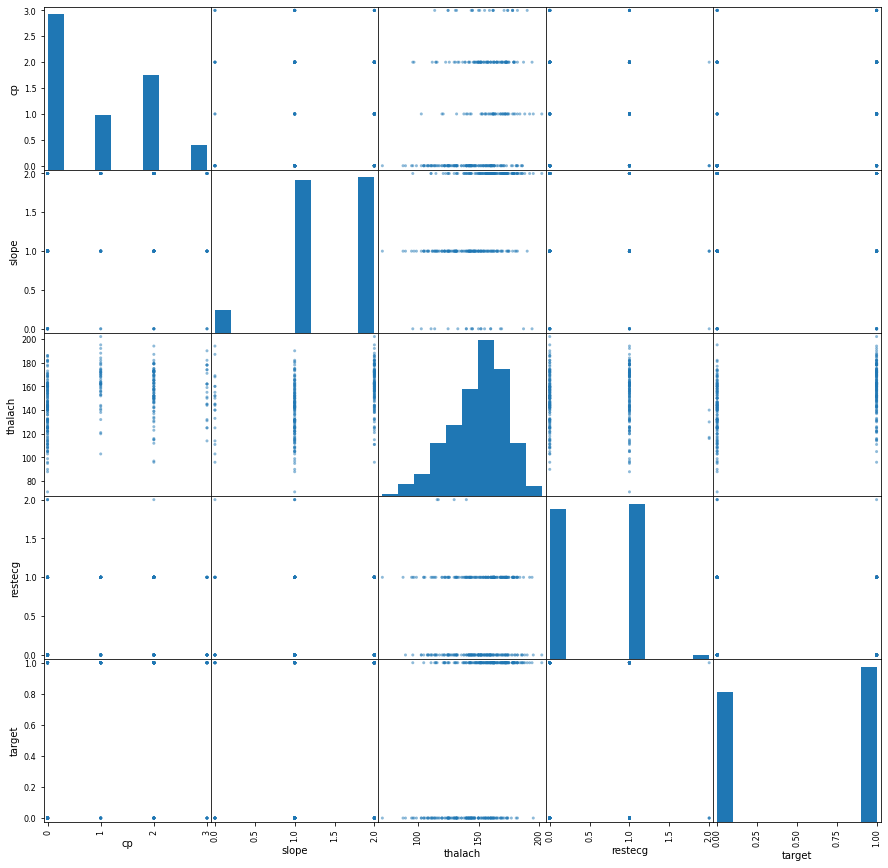

In [57]:
from pandas.plotting import scatter_matrix
attributes = ["cp", "slope", "thalach", "restecg", "target"]
scatter_matrix(df[attributes], figsize = (15, 15))

In [58]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', MinMaxScaler()),
    ])


df_num = df.select_dtypes(include=[np.number])
df_num_trans = num_pipeline.fit_transform(df_num)
df_num_trans
df_num_trans.shape

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = ["age", "trestbps", "chol", "thalach", "exang", "oldpeak", "ca"]
cat_attribs = ["sex", "cp", "fbs", "restecg", "slope", "thal"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
heart = df.drop("target", axis = 1)
heart_disease = df["target"].copy()
heart_prepared = full_pipeline.fit_transform(heart)
heart_prepared
heart_prepared.shape

(303, 25)

In [61]:
heart_df = pd.DataFrame(heart_prepared)
heart_df["target"] = heart_disease
heart_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,target
0,0.708333,0.481132,0.244292,0.603053,0.0,0.370968,0.00,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,0.166667,0.339623,0.283105,0.885496,0.0,0.564516,0.00,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.250000,0.339623,0.178082,0.770992,0.0,0.225806,0.00,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,0.562500,0.245283,0.251142,0.816794,0.0,0.129032,0.00,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,0.583333,0.245283,0.520548,0.702290,1.0,0.096774,0.00,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.396947,1.0,0.032258,0.00,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
299,0.333333,0.150943,0.315068,0.465649,0.0,0.193548,0.00,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
300,0.812500,0.471698,0.152968,0.534351,0.0,0.548387,0.50,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
301,0.583333,0.339623,0.011416,0.335878,1.0,0.193548,0.25,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


In [62]:
train_set, test_set = split_train_test(heart_df, 0.2)
heart_df.shape

(303, 26)

In [63]:
train_set.shape

(243, 26)

In [64]:
test_set.shape

(60, 26)

In [65]:
x = train_set.iloc[:,:25]
y = train_set.iloc[:,25]
print(x)
print(y)

           0         1         2         3    4         5     6    7    8   \
264  0.520833  0.150943  0.182648  0.282443  1.0  0.000000  0.25  0.0  1.0   
129  0.937500  0.245283  0.326484  0.381679  1.0  0.032258  0.25  1.0  0.0   
78   0.479167  0.320755  0.180365  0.862595  0.0  0.000000  0.00  0.0  1.0   
201  0.645833  0.292453  0.301370  0.534351  1.0  0.451613  0.25  0.0  1.0   
244  0.562500  0.358491  0.132420  0.259542  1.0  0.338710  0.25  0.0  1.0   
..        ...       ...       ...       ...  ...       ...   ...  ...  ...   
100  0.270833  0.509434  0.269406  0.816794  0.0  0.129032  0.50  0.0  1.0   
196  0.354167  0.528302  0.239726  0.580153  0.0  0.580645  0.00  0.0  1.0   
102  0.708333  0.433962  0.157534  0.824427  0.0  0.000000  0.50  1.0  0.0   
127  0.791667  0.547170  0.344749  0.770992  0.0  0.000000  0.25  1.0  0.0   
228  0.625000  0.716981  0.369863  0.671756  0.0  0.032258  0.00  0.0  1.0   

      9   ...   15   16   17   18   19   20   21   22   23   24

In [66]:
X = test_set.iloc[:,:25]
Y = test_set.iloc[:,25]
print(X)
print(Y)

           0         1         2         3    4         5     6    7    8   \
206  0.625000  0.150943  0.257991  0.541985  1.0  0.193548  0.25  0.0  1.0   
185  0.312500  0.169811  0.374429  0.625954  0.0  0.000000  0.25  0.0  1.0   
92   0.479167  0.415094  0.221461  0.748092  0.0  0.000000  1.00  0.0  1.0   
176  0.645833  0.216981  0.237443  0.679389  1.0  0.225806  0.50  0.0  1.0   
230  0.375000  0.132075  0.267123  0.618321  0.0  0.000000  0.00  0.0  1.0   
182  0.666667  0.339623  0.465753  0.748092  0.0  0.000000  0.00  1.0  0.0   
117  0.562500  0.245283  0.152968  0.694656  0.0  0.306452  0.00  0.0  1.0   
57   0.333333  0.198113  0.305936  0.870229  0.0  0.000000  0.00  0.0  1.0   
159  0.562500  0.339623  0.216895  0.702290  0.0  0.000000  0.00  0.0  1.0   
87   0.354167  0.066038  0.162100  0.648855  0.0  0.000000  0.00  0.0  1.0   
29   0.500000  0.339623  0.162100  0.618321  0.0  0.193548  0.00  0.0  1.0   
218  0.750000  0.386792  0.292237  0.427481  0.0  0.451613  0.25

In [67]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())
    

In [68]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(x,y)
tree.predict(X.iloc[:,:])
test_set["predicted"] = tree.predict(X.iloc[:,:])
test_set.head()

<ipython-input-68-9ab303c0ac01>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predicted"] = tree.predict(X.iloc[:,:])


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,target,predicted
206,0.625000,0.150943,0.257991,0.541985,1.0,0.193548,0.25,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
185,0.312500,0.169811,0.374429,0.625954,0.0,0.000000,0.25,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
92,0.479167,0.415094,0.221461,0.748092,0.0,0.000000,1.00,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
176,0.645833,0.216981,0.237443,0.679389,1.0,0.225806,0.50,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
230,0.375000,0.132075,0.267123,0.618321,0.0,0.000000,0.00,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1


In [69]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

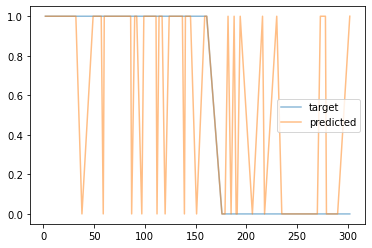

In [70]:
df_test[["target","predicted"]].plot(alpha=0.5);

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[14,  8],
       [ 8, 30]], dtype=int64)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, test_set["predicted"])    

0.7333333333333333

In [73]:
from sklearn.metrics import mean_squared_error
tree_pred = tree.predict(X.iloc[:,:])
tree_mse = mean_squared_error(Y, tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.5163977794943222

In [74]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, x, y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [0.4472136  0.56568542 0.4        0.5        0.45643546 0.40824829
 0.45643546 0.         0.54006172 0.57735027]
Mean: 0.4351430234145283
Standard deviation: 0.15647326451185387


In [75]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x,y)
forest.predict(X.iloc[:,:])
test_set["predicted"] = forest.predict(X.iloc[:,:])
test_set.head()

<ipython-input-75-0bebaf82705f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predicted"] = forest.predict(X.iloc[:,:])


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,target,predicted
206,0.625000,0.150943,0.257991,0.541985,1.0,0.193548,0.25,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
185,0.312500,0.169811,0.374429,0.625954,0.0,0.000000,0.25,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
92,0.479167,0.415094,0.221461,0.748092,0.0,0.000000,1.00,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
176,0.645833,0.216981,0.237443,0.679389,1.0,0.225806,0.50,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
230,0.375000,0.132075,0.267123,0.618321,0.0,0.000000,0.00,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1


In [76]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

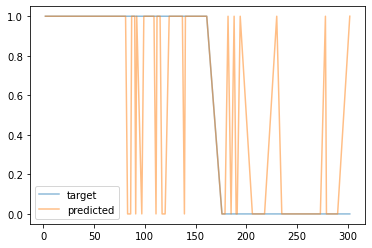

In [77]:
df_test[["target","predicted"]].plot(alpha=0.5);

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[16,  6],
       [ 8, 30]], dtype=int64)

In [79]:
accuracy_score(Y, test_set["predicted"])    

0.7666666666666667

In [80]:
from sklearn.metrics import mean_squared_error
forest_pred = forest.predict(X.iloc[:,:])
forest_mse = mean_squared_error(Y, forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.48304589153964794

In [81]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest, x, y, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [0.4        0.4        0.4472136  0.28867513 0.35355339 0.40824829
 0.45643546 0.28867513 0.5        0.40824829]
Mean: 0.3951049300798222
Standard deviation: 0.06500328883950528


In [82]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(x,y)
log_reg.predict(X.iloc[:,:])
test_set["predicted"] = log_reg.predict(X.iloc[:,:])
test_set.head()


<ipython-input-82-46ebce9b838d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predicted"] = log_reg.predict(X.iloc[:,:])


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,target,predicted
206,0.625000,0.150943,0.257991,0.541985,1.0,0.193548,0.25,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
185,0.312500,0.169811,0.374429,0.625954,0.0,0.000000,0.25,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
92,0.479167,0.415094,0.221461,0.748092,0.0,0.000000,1.00,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
176,0.645833,0.216981,0.237443,0.679389,1.0,0.225806,0.50,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
230,0.375000,0.132075,0.267123,0.618321,0.0,0.000000,0.00,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1


In [83]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

<AxesSubplot:>

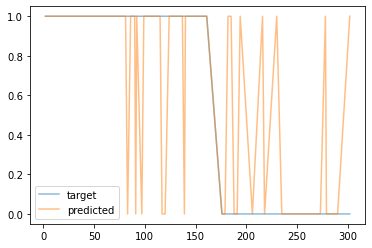

In [84]:
df_test[["target","predicted"]].plot(alpha=0.5)

In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[15,  7],
       [ 6, 32]], dtype=int64)

In [86]:
accuracy_score(Y, test_set["predicted"])    

0.7833333333333333

In [87]:
log_pred = log_reg.predict(X.iloc[:,:])
log_mse = mean_squared_error(Y, log_pred)
log_rmse = np.sqrt(log_mse)
log_rmse

0.4654746681256314

In [88]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, x, y, scoring="neg_mean_squared_error", cv=10)
log_rmse_scores = np.sqrt(-scores)
display_scores(log_rmse_scores)

Scores: [0.34641016 0.4472136  0.4        0.40824829 0.40824829 0.20412415
 0.45643546 0.20412415 0.40824829 0.5       ]
Mean: 0.3783052383456824
Standard deviation: 0.09514101800423992


In [89]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x, y)
Y_model = model.predict(X)
test_set["predicted"] = model.predict(X.iloc[:,:])
test_set.head()

<ipython-input-89-f1a1814739c4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predicted"] = model.predict(X.iloc[:,:])


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,target,predicted
206,0.625000,0.150943,0.257991,0.541985,1.0,0.193548,0.25,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
185,0.312500,0.169811,0.374429,0.625954,0.0,0.000000,0.25,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
92,0.479167,0.415094,0.221461,0.748092,0.0,0.000000,1.00,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
176,0.645833,0.216981,0.237443,0.679389,1.0,0.225806,0.50,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
230,0.375000,0.132075,0.267123,0.618321,0.0,0.000000,0.00,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1


In [90]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

<AxesSubplot:>

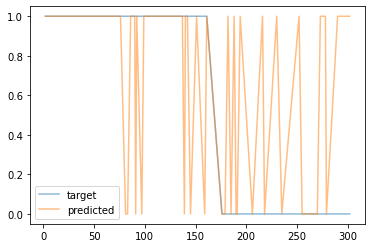

In [91]:
df_test[["target","predicted"]].plot(alpha=0.5)

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[12, 10],
       [ 7, 31]], dtype=int64)

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, Y_model)

0.7166666666666667

In [94]:
from sklearn.metrics import mean_squared_error
knn_pred = model.predict(X.iloc[:,:])
knn_mse = mean_squared_error(Y, knn_pred)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

0.5322906474223771

In [95]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=10)
knn_rmse_scores = np.sqrt(-scores)
display_scores(knn_rmse_scores)

Scores: [0.56568542 0.4        0.52915026 0.35355339 0.45643546 0.35355339
 0.57735027 0.5        0.54006172 0.40824829]
Mean: 0.46840382174571527
Standard deviation: 0.08122721079791062


In [96]:
from sklearn import svm
SVM = svm.LinearSVC()
SVM.fit(x,y)
SVM.predict(X.iloc[:,:])
test_set["predicted"] = SVM.predict(X.iloc[:,:])
test_set.head()

<ipython-input-96-0f1dd19e8d72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predicted"] = SVM.predict(X.iloc[:,:])


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,target,predicted
206,0.625000,0.150943,0.257991,0.541985,1.0,0.193548,0.25,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
185,0.312500,0.169811,0.374429,0.625954,0.0,0.000000,0.25,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1
92,0.479167,0.415094,0.221461,0.748092,0.0,0.000000,1.00,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
176,0.645833,0.216981,0.237443,0.679389,1.0,0.225806,0.50,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
230,0.375000,0.132075,0.267123,0.618321,0.0,0.000000,0.00,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1


In [97]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

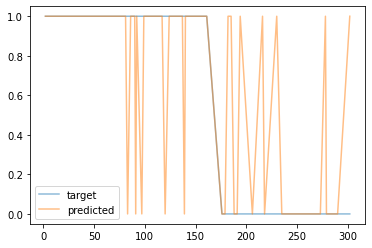

In [98]:
df_test[["target","predicted"]].plot(alpha=0.5);

In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[15,  7],
       [ 5, 33]], dtype=int64)

In [100]:
accuracy_score(Y, test_set["predicted"])    

0.8

In [101]:
SVM_pred = SVM.predict(X.iloc[:,:])
SVM_mse = mean_squared_error(Y, SVM_pred)
SVM_rmse = np.sqrt(SVM_mse)
SVM_rmse

0.4472135954999579

In [102]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVM, x, y, scoring="neg_mean_squared_error", cv=10)
SVM_rmse_scores = np.sqrt(-scores)
display_scores(SVM_rmse_scores)

Scores: [0.4472136  0.4472136  0.4472136  0.35355339 0.35355339 0.28867513
 0.5        0.20412415 0.40824829 0.5       ]
Mean: 0.3949795137977029
Standard deviation: 0.09032081901088425
